In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:
# %%bash
# DIR="AudioFiles/"
# if [ ! -d "$DIR" ]; then
#   # Take action if $DIR does not exists. #
#   # cp -r /content/gdrive/MyDrive/AMLProject/WAV_16000 /content
#   cp -r /content/gdrive/MyDrive/AMLProject/audioLabels.csv /content
#   cp -r /content/gdrive/MyDrive/AMLProject/audioNN/downloaded_datasets /content
# fi

In [3]:
# !git clone https://github.com/A2Zadeh/CMU-MultimodalSDK.git

In [4]:
%set_env PYTHONPATH=C:\Users\User\Documents\repos\CMU-MultimodalSDK

env: PYTHONPATH=C:\Users\User\Documents\repos\CMU-MultimodalSDK


In [5]:
import sys
sys.path.insert(1, "C:\\Users\\User\\Documents\\repos\\CMU-MultimodalSDK")

In [6]:
# !pip install h5py validators tqdm numpy argparse requests colorama

In [7]:
import colorama
import mmsdk
from mmsdk import mmdatasdk
import os
from os import listdir
from os.path import isfile, join

# Path to csd files. If path is incorrect or missing the entire dataset will be downloaded
pathf = 'C:\\Users\\User\\Documents\\repos\\downloaded_datasets'
dataset_dictionary={}


# choice={"cmu_mosei":mmdatasdk.cmu_mosei.highlevel,"cmu_mosi":mmdatasdk.cmu_mosi.highlevel,"pom":mmdatasdk.pom.highlevel}
# labels={"cmu_mosei":mmdatasdk.cmu_mosei.labels,"cmu_mosi":mmdatasdk.cmu_mosi.labels,"pom":mmdatasdk.pom.labels}
##ONLY RUN IF DATASET IS NOT PREVIOUSLY ALIGNED
if os.path.isdir(pathf) is False:
    dataset=mmdatasdk.mmdataset(mmdatasdk.cmu_mosei.highlevel,pathf)
    dataset.add_computational_sequences(mmdatasdk.cmu_mosei.labels,pathf)
else: 
    ##RUN IF DATASET IS PREVIOUSLY ALIGNED aka downloaded previously
    csdfiles = [f for f in listdir(pathf) if isfile(join(pathf, f)) and f[-4:]=='.csd']
    if len(csdfiles)==0:
        print("No csd files in the given folder")
        exit(-2)

    print("%d csd files found"%len(csdfiles))
    for csdfile in csdfiles:
        dataset_dictionary[csdfile]=os.path.join(pathf,csdfile)
    dataset=mmdatasdk.mmdataset(dataset_dictionary)

1 csd files found
[2022-04-26 22:07:43.455] | Success | Computational sequence read from file C:\Users\User\Documents\repos\downloaded_datasets\CMU_MOSEI_Labels.csd ...
[2022-04-26 22:07:44.172] | Status  | Checking the integrity of the <All Labels> computational sequence ...
[2022-04-26 22:07:44.172] | Status  | Checking the format of the data in <All Labels> computational sequence ...


[2022-04-26 22:07:46.109] | Success | <All Labels> computational sequence data in correct format.
[2022-04-26 22:07:46.128] | Status  | Checking the format of the metadata in <All Labels> computational sequence ...
[2022-04-26 22:07:46.128] | Warning | <All Labels> computational sequence does not have all the required metadata ... continuing 
[2022-04-26 22:07:46.129] | Success | Dataset initialized successfully ... 


In [8]:
import pandas as pd

In [9]:
import os

data_files = [(x[0], x[2]) for x in os.walk("C:\\Users\\User\\Documents\\repos\\WAV_16000")]
data_files = data_files[0][1]

In [10]:
len(data_files)

3838

In [11]:
fileids = []
for i in range(len(data_files)):
  fileids.append(data_files[i].strip('.wav'))

In [12]:
import pandas as pd
labelData = pd.read_csv("C:\\Users\\User\\Documents\\repos\\audioLabels.csv")

In [13]:
sampledf = labelData

In [14]:
set1 = list(set(sampledf.file))


master = list(set(set1))
len(master)

3293

In [15]:
len(fileids)

3838

In [16]:
sampledf

,Unnamed: 0,file,start,end,sentiment,happy,sad,anger,surprise,disgust,fear
0,0,--qXJuDtHPw,23.199,30.325,1.000000,0.666667,0.000000,0.0,0.0,0.0,0.000000
1,1,-3g5yACwYnA,82.753,100.555,1.000000,0.666667,0.666667,0.0,0.0,0.0,0.666667
2,2,-3g5yACwYnA,119.919,125.299,0.666667,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,3,-3g5yACwYnA,4.840,14.052,0.000000,0.666667,0.666667,0.0,0.0,0.0,0.333333
4,4,-3g5yACwYnA,13.211,27.521,0.000000,0.333333,0.333333,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
23254,23254,zwTrXwi54us,47.444,49.312,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
23255,23255,zwTrXwi54us,48.511,53.652,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
23256,23256,zwTrXwi54us,52.652,57.942,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000
23257,23257,zwTrXwi54us,57.980,69.326,0.666667,0.333333,0.000000,0.0,0.0,0.0,0.000000


In [17]:
from os.path import exists

# file_exists = exists(path_to_file)

In [18]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
def pickleme(filels):
    numSamplesFFT = 2048
    hopLength = 512
    d = 0
    validfiles_temp = filels
    for i in validfiles_temp:
        labelData_temp = sampledf[sampledf.file == i].reset_index()
        d += 1
        if d % 50 == 0:
          print(d / len(validfiles_temp), end= " ")
        tempdir = 'C:\\Users\\User\\Documents\\repos\\WAV_16000\\' + str(i) + '.wav'
        temptextdir = 'C:\\Users\\User\\Documents\\repos\\Combined\\' + str(i) + '.txt'
        file_exists = exists(tempdir)
        file_exists_text = exists(temptextdir)
        if file_exists & file_exists_text:
            for j in range(len(labelData_temp)):
                text_df_temp = pd.read_csv(temptextdir, sep='___', header=None)
                text_df_temp = text_df_temp[text_df_temp[1] == j]
                text_temp = text_df_temp[4]
                signal_temp, sampleRate_temp = librosa.load(tempdir, sr=16000)
                start_t = float(labelData_temp.iloc[[j]].start)
                end_t = float(labelData_temp.iloc[[j]].end)
                if start_t < 0:
                  start_t = 0
                start_index = librosa.time_to_samples(start_t, sr=sampleRate_temp)
                end_index = librosa.time_to_samples(end_t, sr=sampleRate_temp)
                signal_temp_slice = signal_temp[int(start_index):int(end_index)]
                MFCC = librosa.feature.mfcc(signal_temp_slice, n_fft=numSamplesFFT, hop_length=hopLength, n_mfcc=288)
                MFCC = librosa.util.fix_length(MFCC, size=850)
                librosa.display.specshow(MFCC, sr=16000, hop_length=hopLength)
                plt.savefig('C:\\Users\\User\\Documents\\repos\\MFCCs\\' + str(i) + '-' + str(j))
                yield (str(i), j, signal_temp_slice, MFCC, str(text_temp),
                          float(labelData_temp.iloc[[j]].sentiment), 
                          float(labelData_temp.iloc[[j]].happy), 
                          float(labelData_temp.iloc[[j]].sad), 
                          float(labelData_temp.iloc[[j]].anger), 
                          float(labelData_temp.iloc[[j]].surprise), 
                          float(labelData_temp.iloc[[j]].disgust), 
                          float(labelData_temp.iloc[[j]].fear))

In [24]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
def picklemelabels(filels):
    numSamplesFFT = 2048
    hopLength = 512
    d = 0
    validfiles_temp = filels
    for i in validfiles_temp:
        labelData_temp = sampledf[sampledf.file == i].reset_index()
        d += 1
        if d % 50 == 0:
          print(d / len(validfiles_temp), end= " ")
        tempdir = 'C:\\Users\\User\\Documents\\repos\\WAV_16000\\' + str(i) + '.wav'
        temptextdir = 'C:\\Users\\User\\Documents\\repos\\Combined\\' + str(i) + '.txt'
        file_exists = exists(tempdir)
        file_exists_text = exists(temptextdir)
        if file_exists & file_exists_text:
            for j in range(len(labelData_temp)):
                text_df_temp = pd.read_csv(temptextdir, sep='___', header=None)
                text_df_temp = text_df_temp[text_df_temp[1] == j]
                text_temp = text_df_temp[4]
#                 signal_temp, sampleRate_temp = librosa.load(tempdir, sr=16000)
#                 start_t = float(labelData_temp.iloc[[j]].start)
#                 end_t = float(labelData_temp.iloc[[j]].end)
#                 if start_t < 0:
#                   start_t = 0
#                 start_index = librosa.time_to_samples(start_t, sr=sampleRate_temp)
#                 end_index = librosa.time_to_samples(end_t, sr=sampleRate_temp)
#                 signal_temp_slice = signal_temp[int(start_index):int(end_index)]
#                 MFCC = librosa.feature.mfcc(signal_temp_slice, n_fft=numSamplesFFT, hop_length=hopLength, n_mfcc=288)
#                 MFCC = librosa.util.fix_length(MFCC, size=850)
#                 plt.savefig('C:\\Users\\User\\Documents\\repos\\MFCCs\\' + str(i) + '-' + str(j))
                yield (str(str(i) + '-' + str(j)), str(text_temp),
                          float(labelData_temp.iloc[[j]].sentiment), 
                          float(labelData_temp.iloc[[j]].happy), 
                          float(labelData_temp.iloc[[j]].sad), 
                          float(labelData_temp.iloc[[j]].anger), 
                          float(labelData_temp.iloc[[j]].surprise), 
                          float(labelData_temp.iloc[[j]].disgust), 
                          float(labelData_temp.iloc[[j]].fear))

In [20]:
# obtain the train/dev/test splits - these splits are based on video IDs
train_split = mmdatasdk.cmu_mosei.standard_folds.standard_train_fold
dev_split = mmdatasdk.cmu_mosei.standard_folds.standard_valid_fold
test_split = mmdatasdk.cmu_mosei.standard_folds.standard_test_fold


In [21]:
import sys
import warnings
warnings.filterwarnings("ignore")

train_split_data = pickleme(train_split[1:2000])
dev_split_data = pickleme(dev_split)
test_split_data = pickleme(test_split)

In [ ]:
train_split_data = pickleme(train_split)

In [ ]:
import pickle
obj = []
file_path = 'audioDataTrain2000.pickle'
pickle_out = open(file_path,"wb")
pickle.dump(obj, pickle_out)
pickle_out.close()
for i in train_split_data:
    file = open(file_path, 'rb')
    old_data = pickle.load(file) 
    old_data += i
    with open(file_path, 'ab+') as fp:
        pickle.dump(old_data, fp)
        fp.close()

0.02501250625312656 0.05002501250625312 

In [30]:
import pickle
obj = []
file_path = 'audioDataDevLabels.pickle'
pickle_out = open(file_path, "wb")
pickle.dump(obj, pickle_out)
pickle_out.close()
for i in dev_split_data:
    file = open(file_path, 'rb')
    old_data = pickle.load(file) 
    old_data += i
    with open(file_path, 'ab+') as fp:
        pickle.dump(old_data, fp)
        fp.close()

0.16666666666666666 0.3333333333333333 0.5 0.6666666666666666 0.8333333333333334 1.0 

In [31]:
obj = []
file_path = 'audioDataTestLabels.pickle'
pickle_out = open(file_path,"wb")
pickle.dump(obj, pickle_out)
pickle_out.close()
for i in test_split_data:
    file = open(file_path, 'rb')
    old_data = pickle.load(file) 
    old_data += i
    with open(file_path, 'ab+') as fp:
        pickle.dump(old_data, fp)
        fp.close()

0.07374631268436578 0.14749262536873156 0.22123893805309736 0.2949852507374631 0.3687315634218289 0.4424778761061947 0.5162241887905604 0.5899705014749262 0.6637168141592921 0.7374631268436578 0.8112094395280236 0.8849557522123894 0.9587020648967551 

In [32]:
file_path = 'audioDataTest.pickle'
pickle_out = open(file_path,"rb")
pickle_out.close()

In [77]:
objects = []
file_name = "audioDataDev.pickle"

with (open(file_name, "rb")) as f:
    while True:
        try:
            objects.append(pickle.load(f))
        except EOFError:
            break
f.close()

In [78]:
# Gives the audio id key for the 1000th sample
objects[1000][1]

(13, 850)

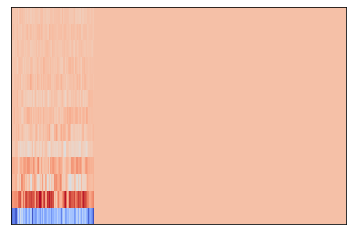

In [54]:
hopLength = 512

librosa.display.specshow(objects[10000][14], sr=16000, hop_length=hopLength)